#Chernoff Bound


100%|██████████| 97/97 [01:18<00:00,  1.23it/s]


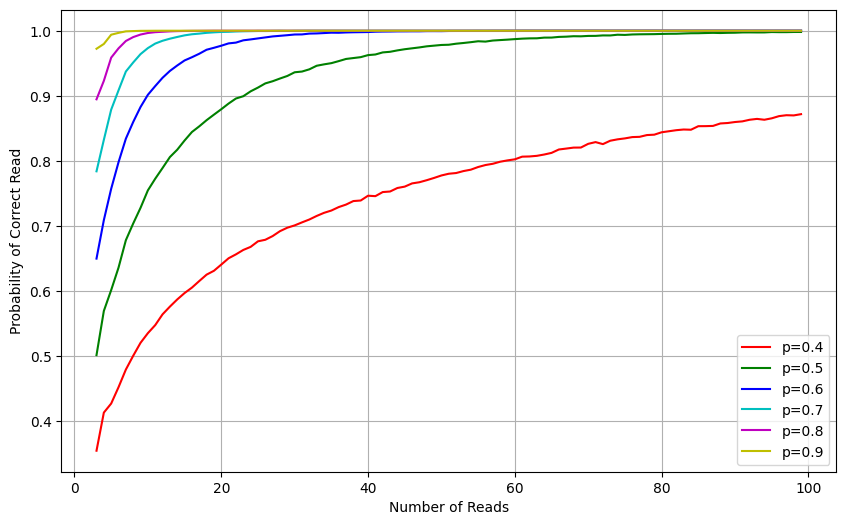

In [1]:
import numpy as np
from numpy.random import multinomial
from tqdm import tqdm
import matplotlib.pyplot as plt


class Trial:
    def __init__(self, probability_of_correct_class, num_classes, number_of_reads):
        # geometric dist for probabilities
        self.pvals = [probability_of_correct_class]
        for i in range(1, 3):
            self.pvals.append((1 - sum(self.pvals)) * 0.5)
        self.pvals += [(1 - sum(self.pvals)) / (num_classes - 3)] * (num_classes - 3)
        self.num_classes = num_classes
        self.number_of_reads = number_of_reads

    def is_success(self):
        arr = multinomial(self.number_of_reads, self.pvals)
        det1 = arr[0]
        det2 = np.max(arr[1:])
        return 1 if det1 > det2 else 0


def monte_carlo(num_experiments, probability_of_correct_class, num_classes, number_of_reads):
    trial = Trial(probability_of_correct_class, num_classes, number_of_reads)
    cnt = 0
    for iter in range(num_experiments):
        cnt += trial.is_success()
    return cnt / num_experiments


x = range(3, 100)
p = [.4, .5, .6, .7, .8, .9]
y = [[] for _ in range(len(p))]

for i in range(len(p)):
    for j in tqdm(range(3, 100)):
        y[i].append(monte_carlo(100000, p[i], 10, j))

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y']

for i in range(len(p)):
    plt.plot(x, y[i], color=colors[i], label='p={}'.format(p[i]))

plt.xlabel('Number of Reads')
plt.ylabel('Probability of Correct Read')
#plt.title('Probability of Correct Read vs Number of Reads')
plt.legend()
plt.grid(True)
plt.savefig('exp.pdf', dpi=300)

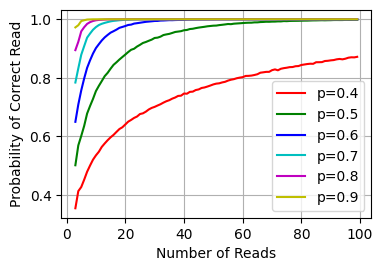

In [2]:
plt.figure(figsize=(4, 2.7))
colors = ['r', 'g', 'b', 'c', 'm', 'y']

for i in range(len(p)):
    plt.plot(x, y[i], color=colors[i], label='p={}'.format(p[i]))

plt.xlabel('Number of Reads')
plt.ylabel('Probability of Correct Read')
#plt.title('Probability of Correct Read vs Number of Reads',fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('exp1.pdf', dpi=300)